In [ ]:
pip install tensorflow keras numpy matplotlib opencv-python nibabel scikit-image

In [ ]:
import nibabel as nib
import numpy as np

# Load a sample NIfTI file
image = nib.load('path_to_image.nii')
image_data = image.get_fdata()

# Normalize image data (for neural network stability)
image_data = image_data / np.max(image_data)

# Visualize a slice of the image
import matplotlib.pyplot as plt

slice_index = 50
plt.imshow(image_data[:, :, slice_index], cmap='gray')
plt.title('Sample MRI Slice')
plt.show()


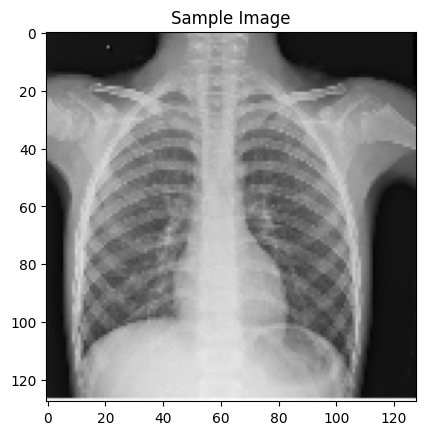

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load a sample image (using jpg/png format for testing)
image_path = 'chestxray.png'  # Replace with your image file path
image = load_img(image_path, target_size=(128, 128), color_mode='grayscale')

# Convert image to numpy array and normalize
image_data = img_to_array(image) / 255.0

# Visualize the image
plt.imshow(image_data.squeeze(), cmap='gray')
plt.title('Sample Image')
plt.show()


In [8]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images(image_dir, mask_dir, image_size=(128, 128)):
    # List and sort the image and mask files
    image_files = sorted(os.listdir(image_dir))
    mask_files = sorted(os.listdir(mask_dir))

    images = []
    masks = []
    for img_file, mask_file in zip(image_files, mask_files):
        # Load and resize images and masks
        img = load_img(os.path.join(image_dir, img_file), target_size=image_size, color_mode='grayscale')
        mask = load_img(os.path.join(mask_dir, mask_file), target_size=image_size, color_mode='grayscale')

        # Convert to numpy arrays and normalize
        images.append(img_to_array(img) / 255.0)  # Normalize to [0, 1]
        masks.append(img_to_array(mask) / 255.0)  # Normalize to [0, 1]

    return np.array(images), np.array(masks)

# Example usage with raw strings for paths
X_train, y_train = load_images(
    r'C:\Users\lenovo\Desktop\test\archive (2)\data\Lung Segmentation\CXR_png',
    r'C:\Users\lenovo\Desktop\test\archive (2)\data\Lung Segmentation\masks'
)


In [9]:
from tensorflow.keras import layers, models

def unet(input_size=(128, 128, 1)):
    inputs = layers.Input(input_size)
    
    # Encoder
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)
    
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)

    # Bottleneck
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)

    # Decoder
    up1 = layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same')(conv3)
    concat1 = layers.concatenate([up1, conv2], axis=-1)
    conv4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(concat1)
    conv4 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)

    up2 = layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(conv4)
    concat2 = layers.concatenate([up2, conv1], axis=-1)
    conv5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(concat2)
    conv5 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv5)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(conv5)

    model = models.Model(inputs, outputs)
    return model

# Create the U-Net model
model = unet()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 32, 32,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 64, 64,    │    295,040 │ conv2d_5[0][0]    │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64, 64,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 256)              │            │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │    295,040 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 128, 128,  │     73,792 │ conv2d_7[0][0]    │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128, 128,  │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 128)              │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 128, 128,  │     73,792 │ concatenate_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 128, 128,  │     36,928 │ conv2d_8[0][0]  

 Total params: 2,066,497 (7.88 MB)

 Trainable params: 2,066,497 (7.88 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.7477 - loss: 0.6312 - val_accuracy: 0.7433 - val_loss: 0.5421
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.7853 - loss: 0.4376 - val_accuracy: 0.7945 - val_loss: 0.4939
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.8482 - loss: 0.3352 - val_accuracy: 0.8081 - val_loss: 0.4361
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.8650 - loss: 0.3007 - val_accuracy: 0.8254 - val_loss: 0.4076
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.8607 - loss: 0.3094 - val_accuracy: 0.8159 - val_loss: 0.4432
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 119s 3s/step - accuracy: 0.8668 - loss: 0.2984 - val_accuracy: 0.8223 - val_loss: 0.4144
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 215s 5s/step - accuracy: 0.8644 - loss: 0.2964 - val_accuracy: 0.8273 - val_loss: 0.4356
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.8745 - loss: 0.2832 - val_accuracy: 0.8230 - val_los

22/22 ━━━━━━━━━━━━━━━━━━━━ 18s 819ms/step - accuracy: 0.8735 - loss: 0.2800
Test Loss: 0.29998156428337097, Test Accuracy: 0.8641595244407654
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


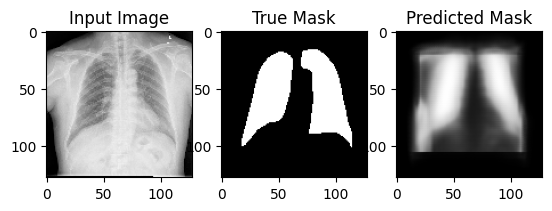

In [11]:
# Evaluate the model on the training set (or a test/validation set)
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Visualize predictions
sample_image = X_train[0]  # Example image
sample_mask = y_train[0]  # Corresponding mask

# Predict the mask
predicted_mask = model.predict(sample_image.reshape(1, *sample_image.shape))

# Plot the results
plt.subplot(1, 3, 1)
plt.title('Input Image')
plt.imshow(sample_image.squeeze(), cmap='gray')

plt.subplot(1, 3, 2)
plt.title('True Mask')
plt.imshow(sample_mask.squeeze(), cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Predicted Mask')
plt.imshow(predicted_mask.squeeze(), cmap='gray')

plt.show()


In [ ]:
# Save the model
model.save('unet_model.h5')

# To load the saved model later
from tensorflow.keras.models import load_model
model = load_model('unet_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

model_path = ''  # Replace with the correct path
model = load_model(model_path)


In [ ]:
pip install tensorflow h5py


In [ ]:
from tensorflow.keras.models import load_model

# Replace with the path where your `unet_model.h5` is stored
model_path = 'unet_model.h5'
model = load_model(model_path)

# Summary of the model to verify it loaded correctly
model.summary()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step


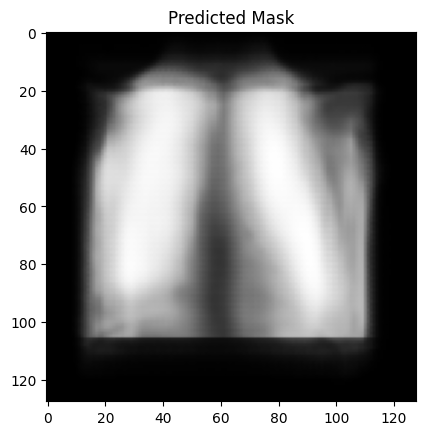

In [17]:
# Assuming you have preprocessed an image called `image_data`
prediction = model.predict(image_data[np.newaxis, ...])
plt.imshow(prediction.squeeze(), cmap='gray')
plt.title('Predicted Mask')
plt.show()
